In [50]:
# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Machine learning

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,roc_curve, auc
# Tensor Flow and Keras
import tensorflow as tf
import keras
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import Dropout


In [51]:
# loading data set
data_raw = pd.read_csv("bank.csv")

In [52]:
data_raw.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [53]:
# making copy of raw data to do preprocesing 
data = pd.DataFrame.copy(data_raw)

In [54]:
# shape of data set
data.shape

(10000, 14)

In [55]:
# description of all variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [56]:
# Check null data
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
#Descripbe data 

data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [58]:
data.head(10)

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   
5       8  113755.78              2          1               0   
6       7       0.00              2          1               1   
7       4  115046.74              4          1               0   
8       4  142051.07              2          0               1   
9       2  134603.88              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0  
5        149756.71       1  
6         10062.80       0  
7        119346.88       1  
8         74940.50       0  
9         71725.73       0

In [59]:
# creating numerical, categorical & target columns lists
categorical_features = [features for features in data.columns if data[features].dtypes == "O"]  
print(len(categorical_features),"no of categorical variables")

numerical_features = ["CreditScore", "Age", "Balance", "EstimatedSalary"]
print(len(numerical_features),"no of numerical variables")

discrete_features = ["Tenure","NumOfProducts","HasCrCard","IsActiveMember"]
print(len(discrete_features),"no of discrete variables")

target = ["Exited"]
print("target has",len(target),"variable")

3 no of categorical variables
4 no of numerical variables
4 no of discrete variables
target has 1 variable


In [60]:
# checking all unique values of categorical variable
for feature in categorical_features:
    print(feature,"has",len(data[feature].value_counts()),"unique values","\n", data[feature].value_counts())

Surname has 2932 unique values 
 Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Ndubuisi      1
Weller        1
Lanford       1
Gresswell     1
Chadwick      1
Name: Surname, Length: 2932, dtype: int64
Geography has 3 unique values 
 France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Gender has 2 unique values 
 Male      5457
Female    4543
Name: Gender, dtype: int64


In [61]:
# checking all unique values of discrete variable
for feature in discrete_features:
    print(feature,"has",len(data[feature].value_counts()),"unique values","\n", data[feature].value_counts())

Tenure has 11 unique values 
 2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
NumOfProducts has 4 unique values 
 1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
HasCrCard has 2 unique values 
 1    7055
0    2945
Name: HasCrCard, dtype: int64
IsActiveMember has 2 unique values 
 1    5151
0    4849
Name: IsActiveMember, dtype: int64


Text(0.5, 1.0, 'Distribution of output classes')

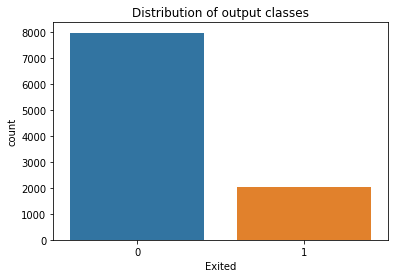

In [62]:
# EDA 
# need to check the distribution of output classes
#  Output classes need to be balanced
data_EDA = pd.DataFrame(data)
sns.countplot(x="Exited", data=data_EDA)
plt.title("Distribution of output classes")

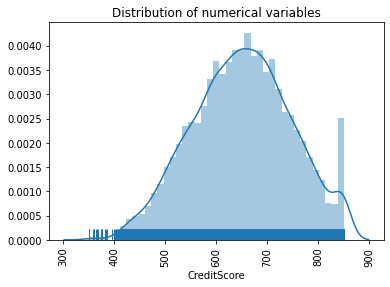

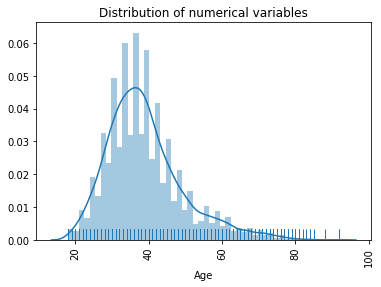

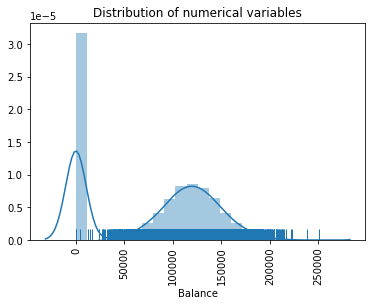

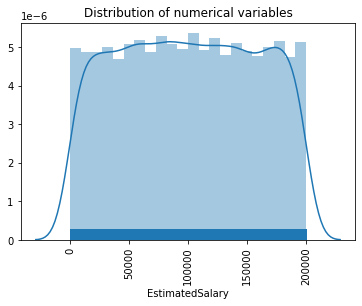

In [63]:
# Univariate Analysis using histogram
# understanding more in histogram of caontinous variables
for features in numerical_features:
    data_EDA = data.copy()
    sns.distplot(data_EDA[features], hist=True, kde=True, rug=True)
    plt.xlabel(features)
    plt.xticks(rotation=90)
    plt.title("Distribution of numerical variables")
    plt.show()

In [64]:
#Age variable has right skewed distribution which means most customers are 25-50 years age group. 
# Lot of customers have zero account balance.

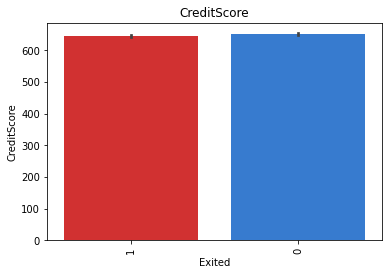

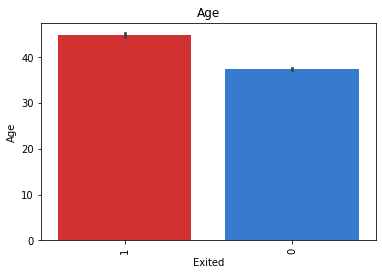

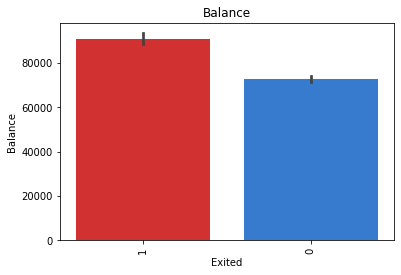

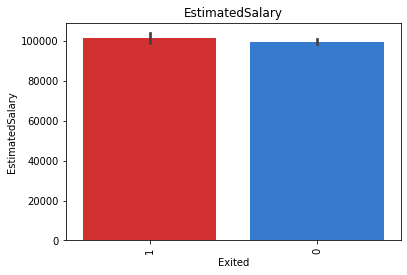

In [65]:
# relationship between numerical variable vs target
for feature in numerical_features:
    data_EDA=data.copy()
    sns.barplot(x="Exited", y=feature, data=data_EDA, order=[1,0], palette=colors1)
    plt.xlabel('Exited')
    plt.xticks(rotation=90)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [66]:
#The average age group of exited customers is 45 years 
# 650 is avearge credit score of existed customer 
# 86000 is average balance & 100000 is average salary of exited cust

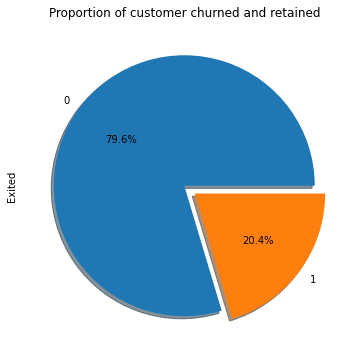

0    7963
1    2037
Name: Exited, dtype: int64

In [67]:
# Percentage of customer churn is ~20.4%
value_counts = pd.value_counts(data_EDA['Exited'])
plt.figure(figsize = (6,6))
value_counts.plot(kind = 'pie', explode = [0,0.1],autopct='%1.1f%%', shadow=True)
plt.title('Proportion of customer churned and retained')
plt.show()
value_counts

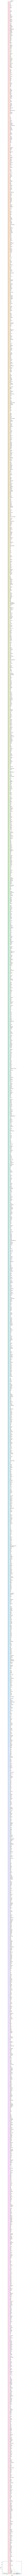

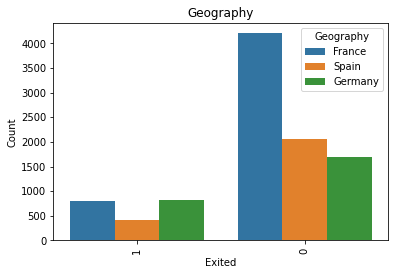

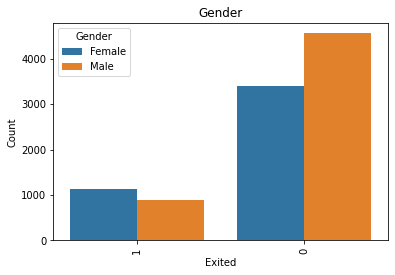

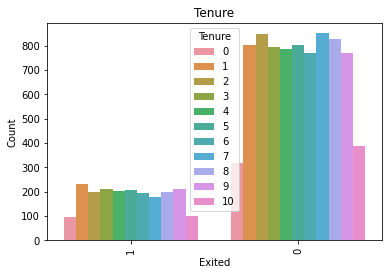

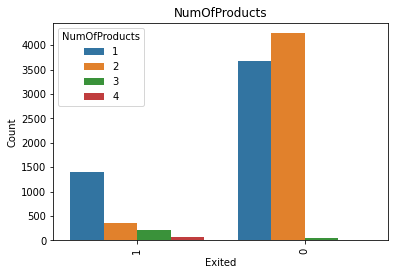

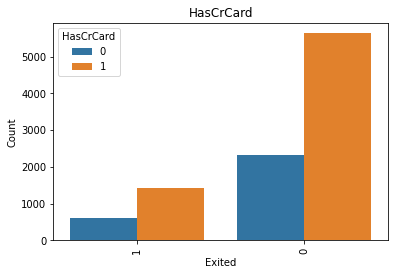

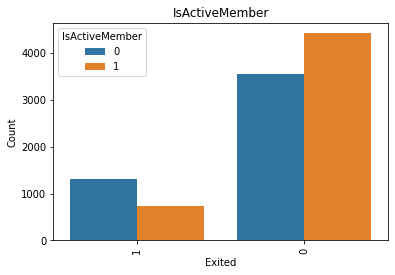

In [74]:
# Multivariate Analysis 
# checking relationship between categorical variables and target

for feature in categorical_features + discrete_features:
    data_EDA=data.copy()
    sns.countplot(x='Exited', hue=feature, data=data_EDA, order=[1,0])
    plt.xlabel('Exited')
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [75]:
#Germans and french people more likely to exit 
# Women have more exit rate 
# Customer who has credit card are more likely to leave 
# Not active customer is leaving 
# One year old customers are more likely to leave

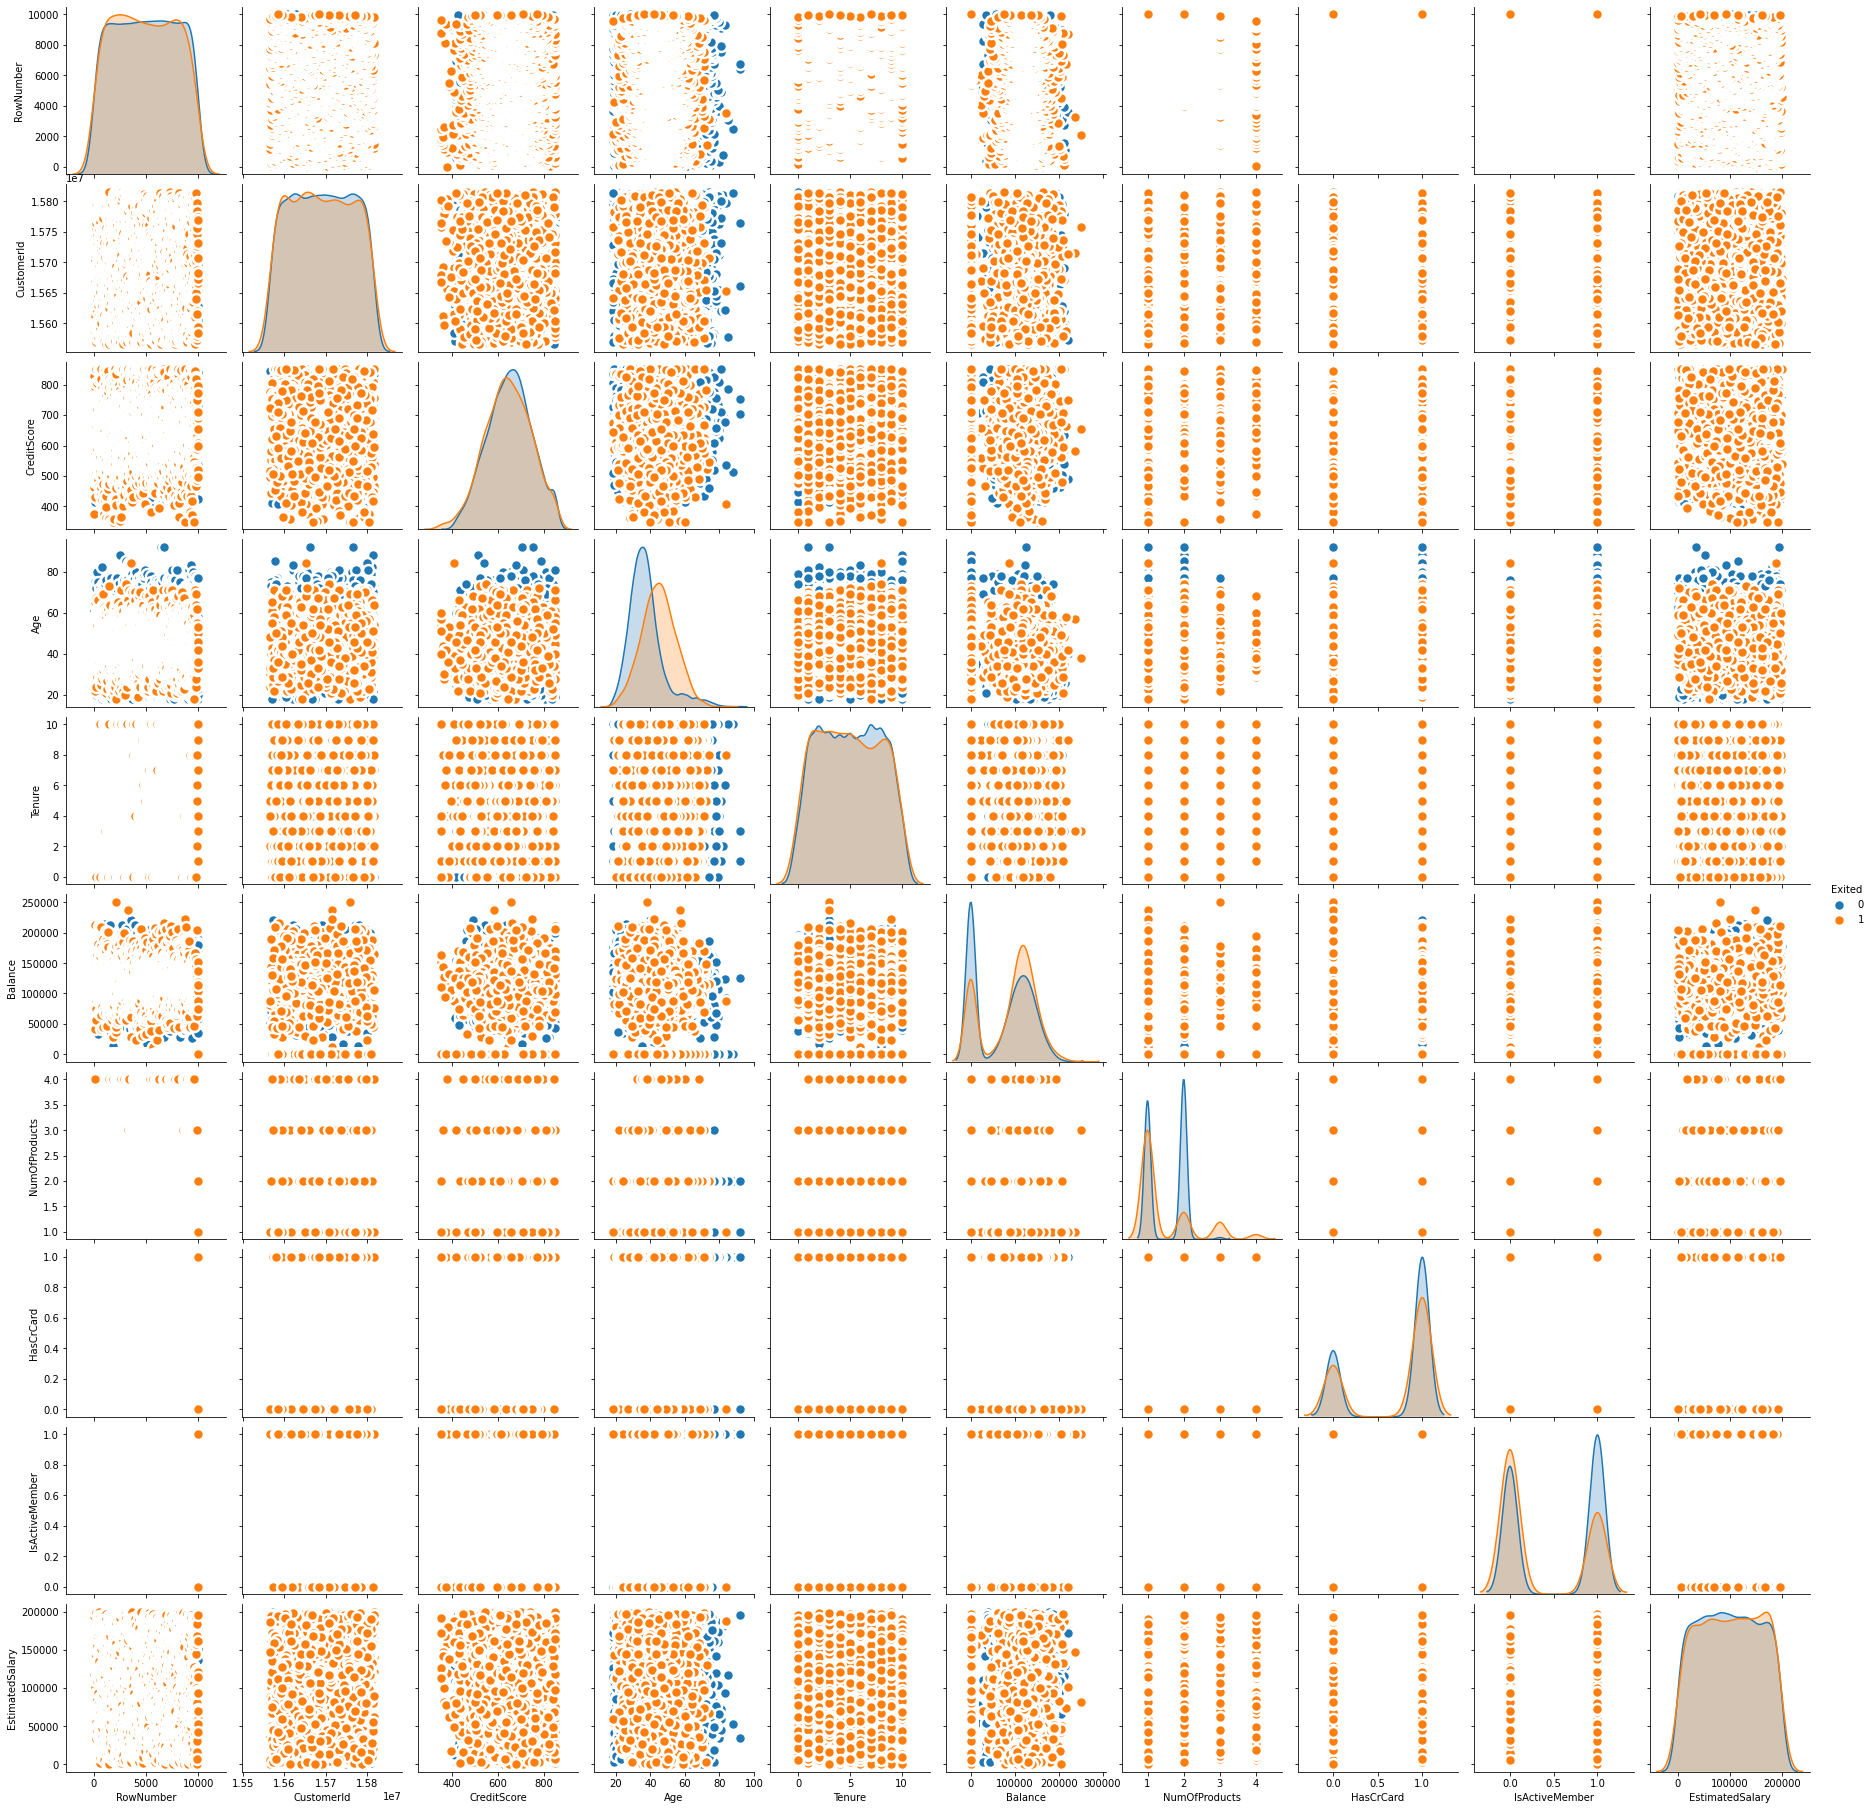

In [76]:
# corelation plot 
sns.pairplot(data_EDA, kind="scatter", hue="Exited", plot_kws=dict(s=120, edgecolor="white", linewidth=2.5))
plt.show()

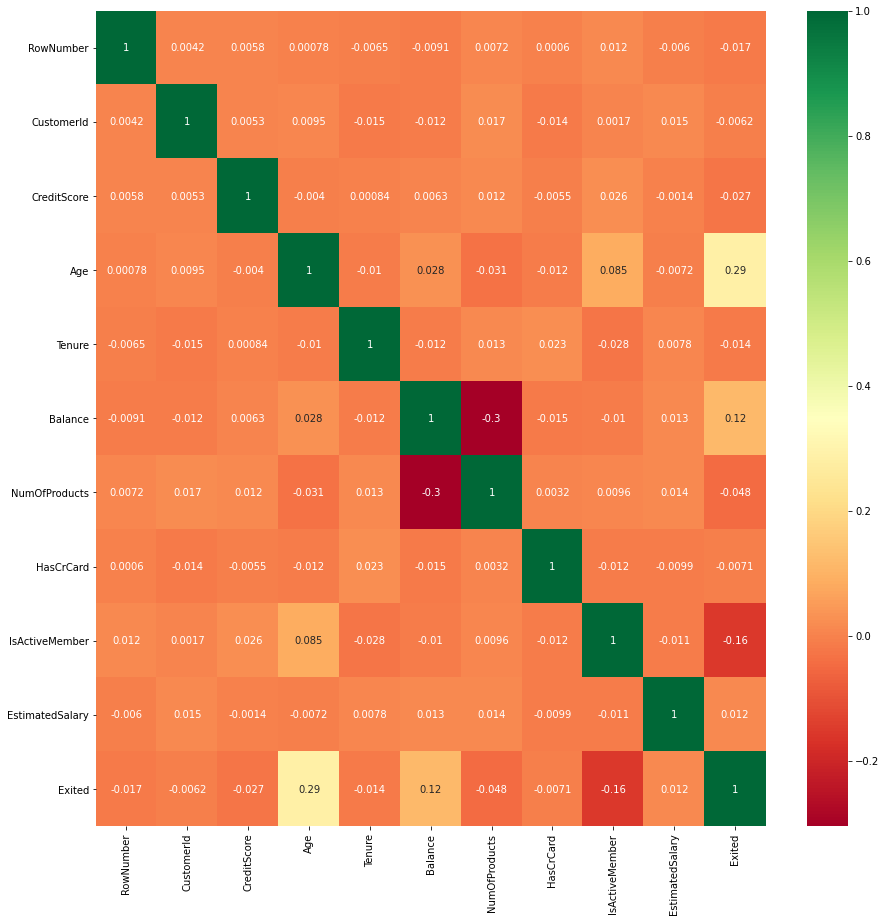

In [71]:
plt.figure(figsize = (15,15))
sns.heatmap(data_EDA.corr(), annot = True, cmap = 'RdYlGn')

In [77]:
# data preparation...creating independent and dependent features
# we do not consider Row Number and Customer Id as they are not needed .
X = data_EDA.iloc[:,3:-1].values
y = data_EDA.iloc[:,-1].values

In [78]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [79]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [80]:
# Label encoding Gender 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [81]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [82]:
# one hot encoding Geography
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [83]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [84]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [86]:
# splitting train and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [87]:
# Feature scaling using Standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [88]:
# Modeliing , building with ANN

# Model 1 using Sequential Keras , RELU , batch size= 10 and EPoch 50 

In [89]:
import tensorflow as tf

In [90]:
# initialize ANN with sequential model 
ann = tf.keras.models.Sequential()

In [91]:
# adding input and first hidden layer use relu
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [92]:
# adding second hidden laer using relu
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [93]:
# adding the output layer
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [94]:
# Compile the ANN
ann.compile(optimizer  ='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [95]:
# Fitting ANN to train set with batch size 10 and epocs as 50
model_history = ann.fit(X_train, y_train,validation_split=0.33,batch_size = 10, epochs = 50)

Epoch 1/50
536/536 [==============================] - 1s 1ms/step - loss: 0.5103 - accuracy: 0.7858 - val_loss: 0.4617 - val_accuracy: 0.7955
Epoch 2/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4489 - accuracy: 0.7962 - val_loss: 0.4401 - val_accuracy: 0.7955
Epoch 3/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4311 - accuracy: 0.7962 - val_loss: 0.4298 - val_accuracy: 0.7955
Epoch 4/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4226 - accuracy: 0.7962 - val_loss: 0.4248 - val_accuracy: 0.7955
Epoch 5/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.7962 - val_loss: 0.4213 - val_accuracy: 0.7955
Epoch 6/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4113 - accuracy: 0.8085 - val_loss: 0.4179 - val_accuracy: 0.8114
Epoch 7/50
536/536 [==============================] - 1s 1ms/step - loss: 0.4065 - accuracy: 0.8175 - val_loss: 0.4153 - val_accuracy: 0.8111
Epoch 

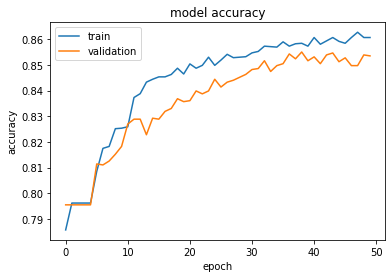

In [96]:
# Visualize accuracy of model 
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

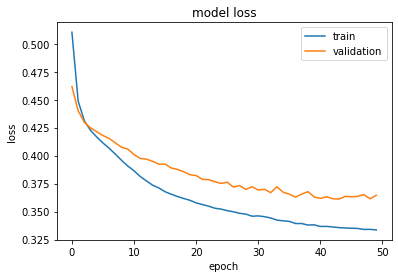

In [97]:
# vizualize the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [98]:
# Predict accuracy with threshold of 0.5
y_pred = ann.predict(X_test)
y_pred =(y_pred > 0.5)

In [99]:
# create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1497   98]
 [ 198  207]]
0.852


In [101]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.51      0.58       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.75      2000
weighted avg       0.84      0.85      0.84      2000



# Model 2: Hyper-parameter tuning using Grid search with multiple learning rates and 5 fold validation

In [128]:
# tried with my laptop to run multiple batch sizez and epochs but it was taking too long to execute 
# ended up with {'batch_size': 10, 'epochs': 150, 'optimizers': 'Adam'}
# 5 fold validation with n_jobs=-3 for faster speed.

from sklearn.model_selection import GridSearchCV
def build_classifier(lrs):
    classifier = Sequential()
    
    classifier.add(Dense(6, activation = "relu"))
    classifier.add(Dense(1, activation = "sigmoid"))
    classifier.compile(optimizer = keras.optimizers.Adam(lr = lrs), loss = "binary_crossentropy", metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 150)
parameters = {'lrs':[ 0.001, 0.003]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5 ,n_jobs=-3)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/150
800/800 [==============================] - 1s 688us/step - loss: 0.5509 - accuracy: 0.7469
Epoch 2/150
800/800 [==============================] - 1s 701us/step - loss: 0.4413 - accuracy: 0.8135
Epoch 3/150
800/800 [==============================] - 1s 646us/step - loss: 0.4209 - accuracy: 0.8254
Epoch 4/150
800/800 [==============================] - 1s 746us/step - loss: 0.4084 - accuracy: 0.8298
Epoch 5/150
800/800 [==============================] - 1s 692us/step - loss: 0.3979 - accuracy: 0.8381
Epoch 6/150
800/800 [==============================] - 1s 740us/step - loss: 0.3886 - accuracy: 0.8409
Epoch 7/150
800/800 [==============================] - 1s 698us/step - loss: 0.3800 - accuracy: 0.8436
Epoch 8/150
800/800 [==============================] - 1s 719us/step - loss: 0.3721 - accuracy: 0.8496
Epoch 9/150
800/800 [==============================] - 1s 754us/step - loss: 0.3665 - accuracy: 0.8531
Epoch 10/150
800/800 [==============================] - 1s 721us/step - l

800/800 [==============================] - 1s 708us/step - loss: 0.3351 - accuracy: 0.8639
Epoch 80/150
800/800 [==============================] - 1s 643us/step - loss: 0.3348 - accuracy: 0.8621
Epoch 81/150
800/800 [==============================] - 1s 696us/step - loss: 0.3349 - accuracy: 0.8612
Epoch 82/150
800/800 [==============================] - 1s 640us/step - loss: 0.3342 - accuracy: 0.8620
Epoch 83/150
800/800 [==============================] - 1s 721us/step - loss: 0.3346 - accuracy: 0.8619
Epoch 84/150
800/800 [==============================] - 1s 669us/step - loss: 0.3346 - accuracy: 0.8619
Epoch 85/150
800/800 [==============================] - 1s 669us/step - loss: 0.3345 - accuracy: 0.8621
Epoch 86/150
800/800 [==============================] - 1s 697us/step - loss: 0.3341 - accuracy: 0.8633
Epoch 87/150
800/800 [==============================] - 1s 651us/step - loss: 0.3342 - accuracy: 0.8630
Epoch 88/150
800/800 [==============================] - 1s 676us/step - loss:

In [129]:
display(best_parameters)
display(best_accuracy)

{'lrs': 0.001}

0.8605

In [ ]:
# using above parameters to create new model

In [130]:
# initialize ANN with sequential model 
ann_model2 = tf.keras.models.Sequential()

In [131]:
# adding input and first hidden layer use relu
ann_model2.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [132]:
ann_model2.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [134]:
# Compile the ANN
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
ann_model2.compile(optimizer = sgd_optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [138]:
# Fitting ANN to train set with batch size 10 and epocs as 150
model2_history = ann_model2.fit(X_train, y_train,validation_split=0.33,batch_size = 10, epochs = 150)

Epoch 1/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3553 - accuracy: 0.8556 - val_loss: 0.3718 - val_accuracy: 0.8482
Epoch 2/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3550 - accuracy: 0.8558 - val_loss: 0.3715 - val_accuracy: 0.8485
Epoch 3/150
536/536 [==============================] - 1s 967us/step - loss: 0.3547 - accuracy: 0.8558 - val_loss: 0.3713 - val_accuracy: 0.8489
Epoch 4/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3544 - accuracy: 0.8559 - val_loss: 0.3711 - val_accuracy: 0.8482
Epoch 5/150
536/536 [==============================] - 1s 979us/step - loss: 0.3542 - accuracy: 0.8561 - val_loss: 0.3708 - val_accuracy: 0.8489
Epoch 6/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3539 - accuracy: 0.8561 - val_loss: 0.3706 - val_accuracy: 0.8485
Epoch 7/150
536/536 [==============================] - 1s 966us/step - loss: 0.3536 - accuracy: 0.8567 - val_loss: 0.3704 - val_accuracy: 

536/536 [==============================] - 1s 971us/step - loss: 0.3447 - accuracy: 0.8595 - val_loss: 0.3643 - val_accuracy: 0.8497
Epoch 58/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3446 - accuracy: 0.8599 - val_loss: 0.3642 - val_accuracy: 0.8493
Epoch 59/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3444 - accuracy: 0.8597 - val_loss: 0.3641 - val_accuracy: 0.8497
Epoch 60/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3443 - accuracy: 0.8597 - val_loss: 0.3640 - val_accuracy: 0.8504
Epoch 61/150
536/536 [==============================] - 0s 915us/step - loss: 0.3442 - accuracy: 0.8599 - val_loss: 0.3639 - val_accuracy: 0.8504
Epoch 62/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3441 - accuracy: 0.8597 - val_loss: 0.3639 - val_accuracy: 0.8504
Epoch 63/150
536/536 [==============================] - 1s 979us/step - loss: 0.3440 - accuracy: 0.8600 - val_loss: 0.3638 - val_accuracy: 0.8504

536/536 [==============================] - 1s 945us/step - loss: 0.3403 - accuracy: 0.8615 - val_loss: 0.3617 - val_accuracy: 0.8516
Epoch 114/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3403 - accuracy: 0.8614 - val_loss: 0.3617 - val_accuracy: 0.8519
Epoch 115/150
536/536 [==============================] - 1s 942us/step - loss: 0.3402 - accuracy: 0.8617 - val_loss: 0.3617 - val_accuracy: 0.8519
Epoch 116/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3402 - accuracy: 0.8617 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 117/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3401 - accuracy: 0.8615 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 118/150
536/536 [==============================] - 1s 987us/step - loss: 0.3401 - accuracy: 0.8615 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 119/150
536/536 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8625 - val_loss: 0.3616 - val_accuracy: 

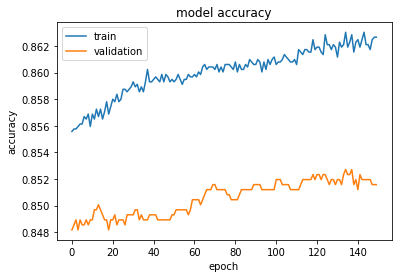

In [139]:
# Visualize accuracy of model 
plt.plot(model2_history.history['accuracy'])
plt.plot(model2_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

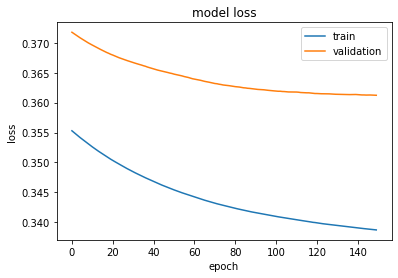

In [140]:
# vizualize the loss
plt.plot(model2_history.history['loss'])
plt.plot(model2_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [141]:
# Predict accuracy with threshold of 0.5
y_pred = ann_model2.predict(X_test)
y_pred =(y_pred > 0.5)

In [142]:
# create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[1529   66]
 [ 210  195]]
0.862


In [143]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1595
           1       0.75      0.48      0.59       405

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# with the change in the hyper params we are able to improve the model accuracy from 0.852 to 0.862

#Germans and french people more likely to exit 
# Women have more exit rate 
# Customer who has credit card are more likely to leave 
# Not active customer is leaving 
# One year old customers are more likely to leave
#The average age group of exited customers is 45 years 
# 650 is avearge credit score of existed customer 
# 86000 is average balance & 100000 is average salary of exited cust.
# Lot of customers have zero account balance.